In [2]:
import pandas as pd
import pandas as pd 
import numpy as np
import string
import nltk
import re 
import os 
import random 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv("../input/all-data/all_data.csv" , lineterminator='\n')

In [4]:
 df.head()

,id,tweets,dialect
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,IQ
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,IQ
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي,IQ
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,IQ
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,IQ


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   tweets   458197 non-null  object
 2   dialect  458197 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.5+ MB


In [6]:
len(df)

458197

In [7]:
df.sample(10)

,id,tweets,dialect
97707,999710313187594240,الناس اللي بتفكر لقدام 👌⚘ https://t.co/Vqsq1kCGDn,PL
363098,590984378521497600,قسم بالله ماقبلك غياب ولا بعدك حضور\nولكن ودي ...,KW
325290,950297434663636992,@jamalfayad منى بو حمزة مش محلها يا ريت نكون ع...,LB
166515,902982320705208448,@news_ger_chekel على فكره هي اشتغلت و تعبت و ن...,JO
109132,993878366813151232,اقسم بالله قربت اصير #نباتي 😳\nولكم حتي فش خبز...,PL
109430,915212385216077824,اذا عمرو اديب دخل غزة وعادي !! \nوكان بحرض علي...,PL
405705,1173722707323695104,سمعتوا يالهلاليين جاكم لان الشيخ سمح له يلعب م...,AE
60793,984006606882033664,@LPwBKSB7WcWDpJv @majedalansari @Beyda2_Qatar ...,QA
288079,717293339675140096,انا ميت مليون واحد ماتوا \nانا كبت وضيقة وخنقه...,EG
348195,1072963200038113152,#مع_او_ضد_اسقاط_القروض عالم مليان فتتوقعون شنو...,KW


In [8]:
df.shape

(458197, 3)

In [9]:
df["dialect"].isna().sum()

0

In [10]:
df["dialect"].value_counts()
# it is imbalanced data

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.hist(df["dialect"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dialect', ylabel='count'>

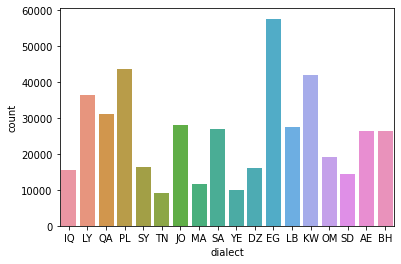

In [12]:
sns.countplot(df["dialect"])
#this data slightly unbalanced 

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

# # normalize_arabic

In [15]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ه", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

# remove_repeating_char

In [16]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

# remove non arabic words

In [17]:
def nospecial(text):
	import re
	text = re.sub("[a-zA-Z0-9]+", "",text)
	return text

# processPost for applying all functions

In [18]:
def preprocess_text(tweet): 

    #remove emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)
    
  
    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    tweet = re.sub(p_tashkeel,"", tweet)

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
     #tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    #remove non arabic words
    tweet = nospecial(tweet)

    #trim    
    tweet = tweet.strip()

#       #text stemming
#     from nltk.stem.isri import ISRIStemmer #not good idea in this task 
#     st = ISRIStemmer()
#     ISRIStemmer().suf32(tweet)
    
    return tweet

In [19]:
print(f"Orignal Text : {df.tweets[13]}")
print()
print(f"Preprocessed Text : {preprocess_text(df.tweets[13])}")

Orignal Text : @3Obeidi ههههه عدوله گلبه ورم من عدنه .. گلك خل اتونس همه بكل شيء مارضين😂😂 فهاي السفره اسمها .،، اتونس وبكيفي🤪

Preprocessed Text : ه عدوله گلبه ورم من عدنه گلك خل اتونس همه بكل شيء مارضين فهاي السفره اسمها اتونس وبكيفي🤪


In [20]:
# from nltk.stem.isri import ISRIStemmer
# st = ISRIStemmer()
# ISRIStemmer().suf32("اعلاميون")

In [21]:
df.tweets = df.tweets.map(preprocess_text)
df.head()

,id,tweets,dialect
0,1175358310087892992,لكن بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب على البشر حيونه وحشيه وتطلبون م...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ


# Removing stop words (i found it is not good in this task to remove stop words)

In [22]:
# from nltk.corpus import stopwords
# import nltk

In [23]:
# nltk.download('stopwords')
# stopwords_list = stopwords.words('arabic')

In [24]:
# stopwords_list

In [25]:
# df["tweets"]=df["tweets"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [26]:
from collections import Counter
import random
from termcolor import colored
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df["dialect"] = labelencoder.fit_transform(df["dialect"])


x = df.tweets
y = df.dialect
print(f'DATA : {x[0]}')
print(f'LABEL: {y[0]}')

DATA : لكن بالنهاية ينتفض يغير
LABEL: 4


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.02, stratify=y, random_state=42 , shuffle = True)

In [28]:
x_train.head()

3489                           يا اخي الحماس الي عنده مشكله
433345    هالحرب الباردة بين دول الشرق الاوسط ما بتنتهي ...
79423     محد سواها معركة الا بلادك وحكومتك ومحد حشد الن...
273458                     كل سنه وانت طيب وبخير يا عم صلاح
237111    اكلهمستحيلتاكلها\nالفت والبوزولوف كن نبقى لجوع...
Name: tweets, dtype: object

## 1-count vectorizer with logestic regression

In [29]:
vectorizer = CountVectorizer() # till now before we experiment spacy is the best represnration 
vectorizer.fit(x_train)
x_train_v = vectorizer.transform(x_train)
x_test_v = vectorizer.transform(x_test)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline


clf = LogisticRegression()
pipe = make_pipeline(vectorizer, clf)
pipe.fit(x_train, y_train);

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
from sklearn import metrics

def print_report(pipe, x_test, y_test):
    y_pred = pipe.predict(x_test)
    report = metrics.classification_report(y_test, y_pred)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

print_report(pipe, x_test, y_test)

              precision    recall  f1-score   support

           0       0.43      0.42      0.42       526
           1       0.39      0.39      0.39       526
           2       0.61      0.50      0.55       324
           3       0.70      0.83      0.76      1153
           4       0.66      0.58      0.62       310
           5       0.42      0.39      0.40       558
           6       0.48      0.51      0.49       842
           7       0.63      0.70      0.66       552
           8       0.61      0.67      0.64       730
           9       0.72      0.58      0.64       231
          10       0.44      0.41      0.42       382
          11       0.50      0.55      0.52       875
          12       0.47      0.48      0.48       621
          13       0.41      0.43      0.42       537
          14       0.69      0.55      0.61       289
          15       0.44      0.34      0.39       325
          16       0.67      0.44      0.53       185
          17       0.44    

# 2- TF-IDF with logestic regression

In [32]:
vec = TfidfVectorizer()

In [33]:
clf = LogisticRegression()

In [34]:
pipe = make_pipeline(vec, clf)
pipe.fit(x_train, y_train);

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [35]:
from sklearn import metrics

def print_report(pipe, x_test, y_test):
    y_pred = pipe.predict(x_test)
    report = metrics.classification_report(y_test, y_pred)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

print_report(pipe, x_test, y_test)

              precision    recall  f1-score   support

           0       0.43      0.40      0.41       526
           1       0.39      0.31      0.34       526
           2       0.61      0.41      0.49       324
           3       0.67      0.82      0.74      1153
           4       0.65      0.54      0.59       310
           5       0.45      0.33      0.38       558
           6       0.44      0.58      0.50       842
           7       0.62      0.68      0.64       552
           8       0.56      0.67      0.61       730
           9       0.69      0.54      0.61       231
          10       0.44      0.31      0.36       382
          11       0.46      0.58      0.51       875
          12       0.45      0.51      0.47       621
          13       0.39      0.43      0.41       537
          14       0.75      0.52      0.61       289
          15       0.46      0.25      0.32       325
          16       0.79      0.34      0.47       185
          17       0.48    

# TF-IDF with n - grams with logestic regression

In [36]:
vec = TfidfVectorizer(analyzer='char_wb', ngram_range=(1, 5), min_df=.01, max_df=.3)

In [37]:
pipe = make_pipeline(vec, clf)
pipe.fit(x_train, y_train);

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [38]:
from sklearn import metrics

def print_report(pipe, x_test, y_test):
    y_pred = pipe.predict(x_test)
    report = metrics.classification_report(y_test, y_pred)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

print_report(pipe, x_test, y_test)

              precision    recall  f1-score   support

           0       0.30      0.27      0.28       526
           1       0.27      0.21      0.23       526
           2       0.48      0.39      0.43       324
           3       0.62      0.79      0.69      1153
           4       0.46      0.45      0.46       310
           5       0.35      0.23      0.28       558
           6       0.40      0.51      0.45       842
           7       0.54      0.62      0.58       552
           8       0.45      0.57      0.50       730
           9       0.54      0.48      0.51       231
          10       0.32      0.23      0.27       382
          11       0.42      0.51      0.46       875
          12       0.40      0.41      0.41       621
          13       0.36      0.37      0.37       537
          14       0.56      0.42      0.48       289
          15       0.37      0.18      0.24       325
          16       0.51      0.30      0.38       185
          17       0.37    

# count vectorizer with linear svc

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

vectorizer = CountVectorizer()
clf = LinearSVC()
pipe = make_pipeline(vectorizer, clf)
pipe.fit(x_train, y_train);

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [40]:
print_report(pipe, x_test, y_test)

              precision    recall  f1-score   support

           0       0.40      0.41      0.41       526
           1       0.37      0.38      0.37       526
           2       0.53      0.52      0.52       324
           3       0.74      0.80      0.77      1153
           4       0.61      0.57      0.59       310
           5       0.37      0.36      0.36       558
           6       0.50      0.48      0.49       842
           7       0.59      0.65      0.62       552
           8       0.63      0.63      0.63       730
           9       0.68      0.58      0.63       231
          10       0.38      0.35      0.36       382
          11       0.47      0.54      0.50       875
          12       0.48      0.49      0.48       621
          13       0.41      0.39      0.40       537
          14       0.66      0.54      0.59       289
          15       0.34      0.30      0.32       325
          16       0.62      0.49      0.55       185
          17       0.29    

# TF-IDF with linear svc

In [41]:
vectorizer = TfidfVectorizer()
clf = LinearSVC()
pipe = make_pipeline(vectorizer, clf)
pipe.fit(x_train, y_train);

In [42]:
print_report(pipe, x_test, y_test)

              precision    recall  f1-score   support

           0       0.45      0.45      0.45       526
           1       0.43      0.39      0.41       526
           2       0.61      0.55      0.58       324
           3       0.72      0.86      0.79      1153
           4       0.65      0.59      0.62       310
           5       0.41      0.37      0.39       558
           6       0.51      0.56      0.54       842
           7       0.63      0.71      0.67       552
           8       0.64      0.68      0.66       730
           9       0.74      0.58      0.65       231
          10       0.46      0.37      0.41       382
          11       0.50      0.58      0.53       875
          12       0.50      0.53      0.52       621
          13       0.44      0.44      0.44       537
          14       0.73      0.59      0.65       289
          15       0.42      0.32      0.36       325
          16       0.70      0.46      0.56       185
          17       0.42    

# Conclusion

I discovered the best combination of results and computational power when text preprocessing without removing stop words or stemming (which is not appropriate for this task), the best text representation is TF-IDF, and the best ML model is linear SVC with an accuracy of 56%.